# Filtering

Write a short report, with images before and after 2D filtering, the python scripts you used for filtering, as well as your comments on 1-6

Let's import the libraries and read in all the images needed for this exercise.

### Import libraries

In [1]:
# Import libraries
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage as ndimage

### Read in all the images

In [31]:
img1 = cv.imread('High-Contrast.jpg')
img2 = cv.imread('LP or HP-Candidates.jpg')
img3 = cv.imread('LP_filter-candidate.jpg')
img4 = cv.imread('Picture1_median_filtering.png')
img5 = cv.imread('Picture2_median_filtering.jpg')
img6 = cv.imread('Picture3_median_filtering.jpg')
img7 = cv.imread('Picture4_median_filtering.jpg')

### Create method for showing four images

In [16]:
def compareImages(figureSize, image, image2, image3, image4, text1, text2, text3, text4):
    fig = plt.figure(figsize=figureSize)
    
    # first image
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(image)
    ax1.set_title(text1)
    ax1.axis('off')
    
    # second image
    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(image2)
    ax2.set_title(text2)
    ax2.axis('off')
    
    # third image 
    ax3 = fig.add_subplot(2,2,3)
    ax3.imshow(image3)
    ax3.set_title(text3)
    ax3.axis('off')
    
    # fourht image
    ax4 = fig.add_subplot(2,2,4)
    ax4.imshow(image4)
    ax4.set_title(text4)
    ax4.axis('off')

    plt.show()

# 1. Apply the following low pass mask on LP_filter-candidate.jpg

|   |   |   |  
|:--|:--|:--|
| 1 | 1 | 1 |
| 1 | 2 | 1 | 
| 1 | 1 | 1 |

with
1/10 (Scaling factor)


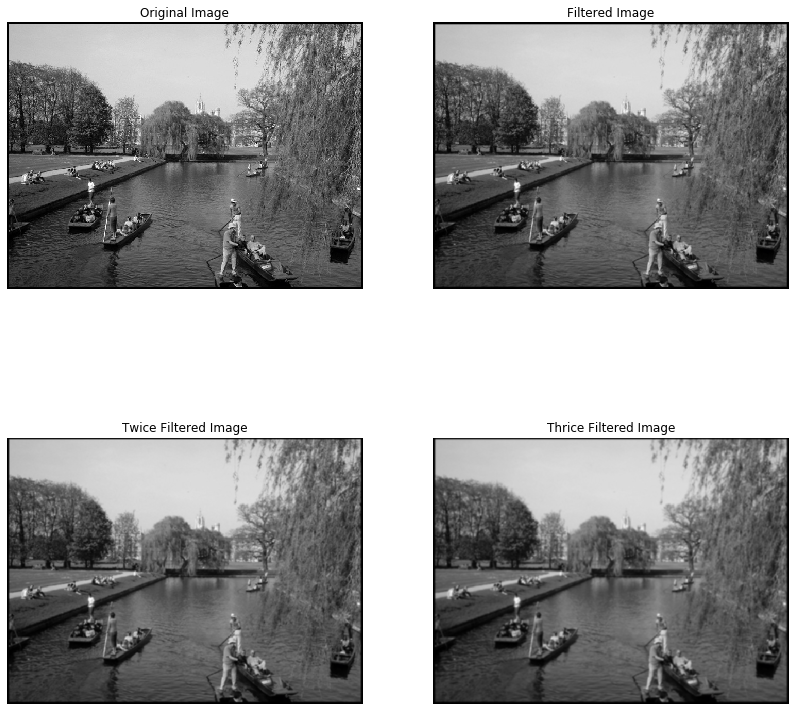

In [27]:
kernelLP = np.array([[1.0,1.0,1.0],[1.0,2.0,1.0],[1.0,1.0,1.0]])/10
filteredImage = cv.filter2D(img3, -1, kernelLP) 
filteredImage2 = cv.filter2D(filteredImage, -1, kernelLP) #filter filtered image
filteredImage3 = cv.filter2D(filteredImage2, -1, kernelLP) #filter filtered image again
    

compareImages((14,14),img3, filteredImage, filteredImage2, filteredImage3, 
              'Original Image', 'Filtered Image', 'Twice Filtered Image','Thrice Filtered Image' )

A low pass filter could be used on images that have high frequencies. This lowpass filter is not very effective and it's hard to see the effect without running the image several times through the filter. Images that have noise become smoother with  aloss of image detail or loss of sharpness. A low pass filter could be used to blur out images in photoshop.

## 2. Apply the following high pass mask on High-Contrast.jpg

|    |    |    |  
|:-- |:-- |:-- |
| -1 | -1 | -1 |
| -1 |  9 | -1 | 
| -1 | -1 | -1 |

with
1 (Scaling factor)

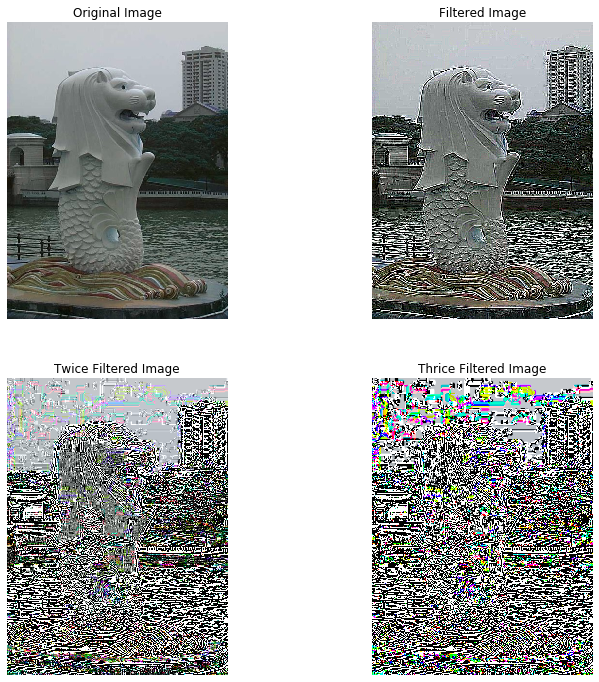

In [32]:
kernelHP = np.array([[-1.0,-1.0,-1.0],[-1.0,9.0,-1.0],[-1.0,-1.0,-1.0]])
filteredHPImage = cv.filter2D(img1, -1, kernelHP) 
filteredHPImage2 = cv.filter2D(filteredHPImage, -1, kernelHP) #filter filtered image
filteredHPImage3 = cv.filter2D(filteredHPImage2, -1, kernelHP) #filter filtered image again

compareImages((12,12), img1, filteredHPImage, filteredHPImage2, filteredHPImage3, 
              'Original Image', 'Filtered Image', 'Twice Filtered Image','Thrice Filtered Image' )

A high pass filter supresses the low frequencies. This type of filter highlights the details. The filter in use seems to bee quiet strong and after a second filtering the image details are mixed with the noise from the image. A high pass filter could be used to sharpen images in photoshop. High pass filtering could also be used in face recognition.

## 3. Apply the Gaussian low pass filter (use function scipy.ndimage.gaussian_filter()) for different smoothing (σ) values to the LP_filter-candidate.jpg image

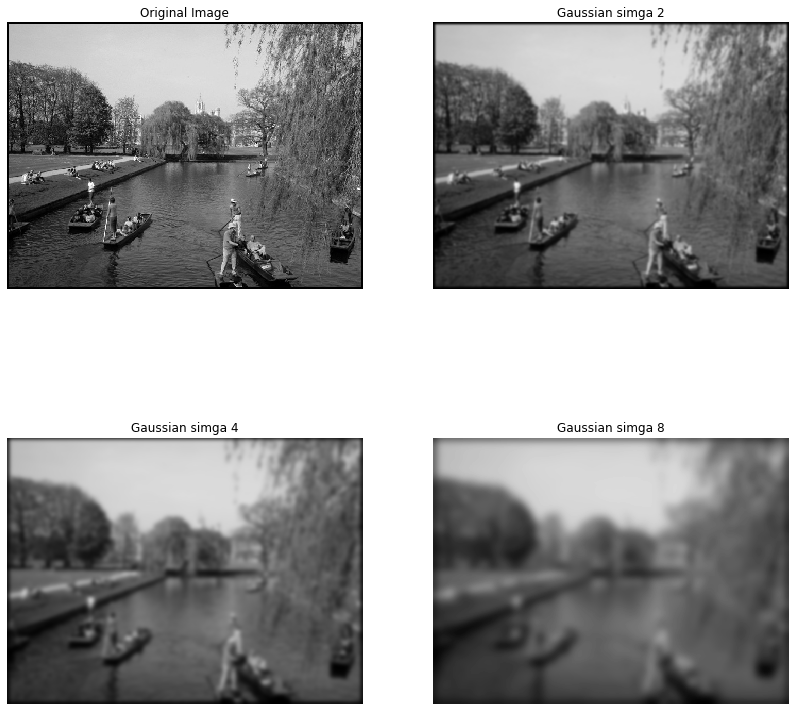

In [37]:
import scipy.ndimage as ndimage

filterdGaussianImage = ndimage.gaussian_filter(img3, sigma=2)
filterdGaussianImage2 = ndimage.gaussian_filter(img3, sigma=4)
filterdGaussianImage3 = ndimage.gaussian_filter(img3, sigma=8)

compareImages((14,14), img3, filterdGaussianImage, filterdGaussianImage2, filterdGaussianImage3, 
              'Original Image', 'Gaussian simga 2', 'Gaussian simga 4','Gaussian simga 8' )

Gaussian filter is a linear filter that seems to be good at bluring and reducing noise in images. The gaussian blur is easier to change the amount of smoothing with sigma. The gaussian blur could be used to blur images in photoshop. Gaussian filter could also be used to smoothen out text or details that are missing "pixels/values" 


## 4. Comment on your findings in 1-3, giving one application where you would use each particular filter type? 

By comparing the Gaussian LP filter results with those you obtained in #1, explain the reason you would select a Gaussian LP filter instead of the LP mask in #1?

Note, in points #1, #2 and #3, you may need to repeatedly apply the filter mask multiple times to observe any visible effects.
 

Gaussian functions are smooth and symmetrical and mimics optical blur. Gaussian filter avoids from washing out the image. Gaussian filter smoothness is easier to change with sigma.

## 5. Apply both a 3x3 and a 7x7 median filtering mask to the attached noisy images (PictureN_medianfiltering.jpg) 
## &
## 6. What happens if the median filter mask window length is increased to say 11x11 pixels?

Please comment on both their noise reduction performance and state whether the larger mask is a better choice than the smaller mask.  

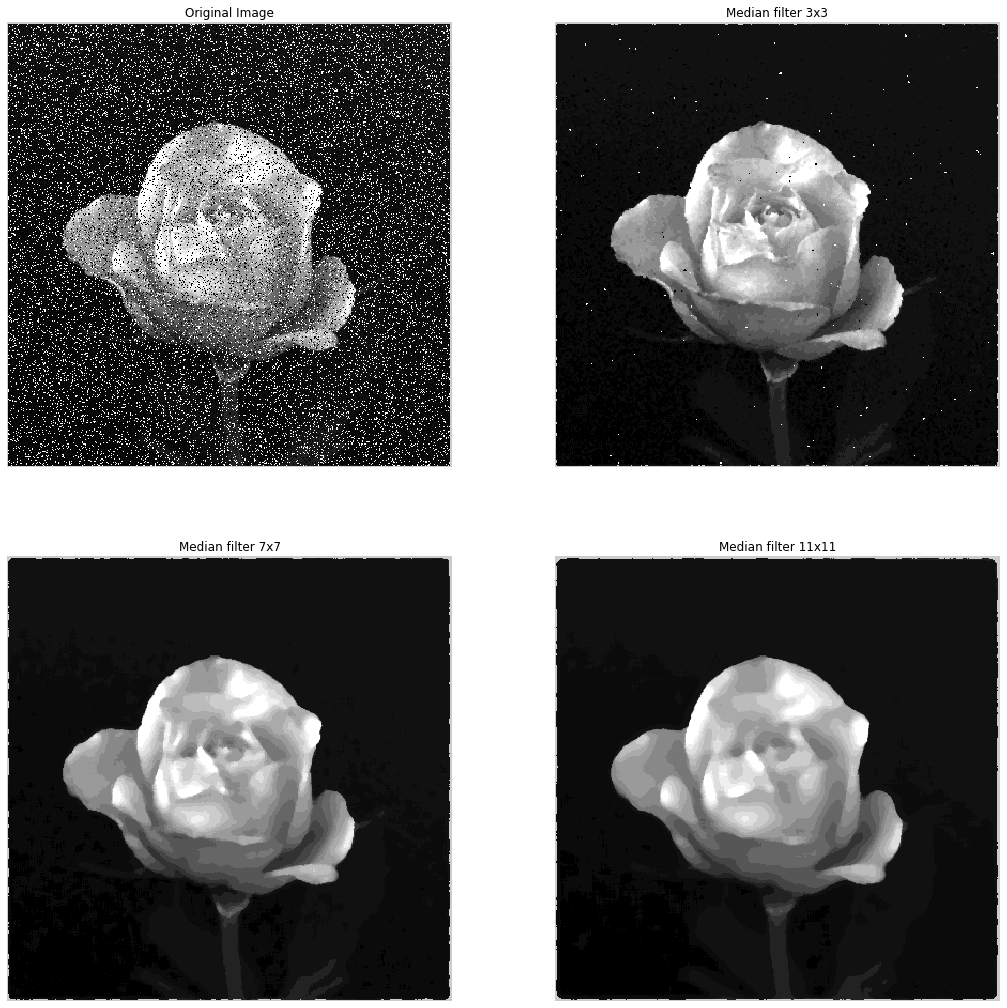

In [23]:
imgMedian3Filtered = cv.medianBlur(img4, ksize=3)
imgMedian7Filtered = cv.medianBlur(img4, ksize=7)
imgMedian11Filtered = cv.medianBlur(img4, ksize=11)

compareImages((18,18), img4, imgMedian3Filtered, imgMedian7Filtered, imgMedian11Filtered, 
              'Original Image', 'Median filter 3x3', 'Median filter 7x7','Median filter 11x11' )

The original state of the image is very noisy. After a median filter that is 3x3 the image is much clearer. You can see the stem of the rose. There is still some noise left after the filter but is already a very clear image with relatively fine details.

After the 7x7 filter the image has no noise left, but instead lost some of the sharpness and details. The image background is starting to build up some artifacts/noise instead.

The 11x11 removes the noise from the image but the background is beginning to become more noisy. The rose is losing all its sharpness and details. The image still retains its edges. 

The 7x7 mask is better suited for this picture because of the large amount of noise.

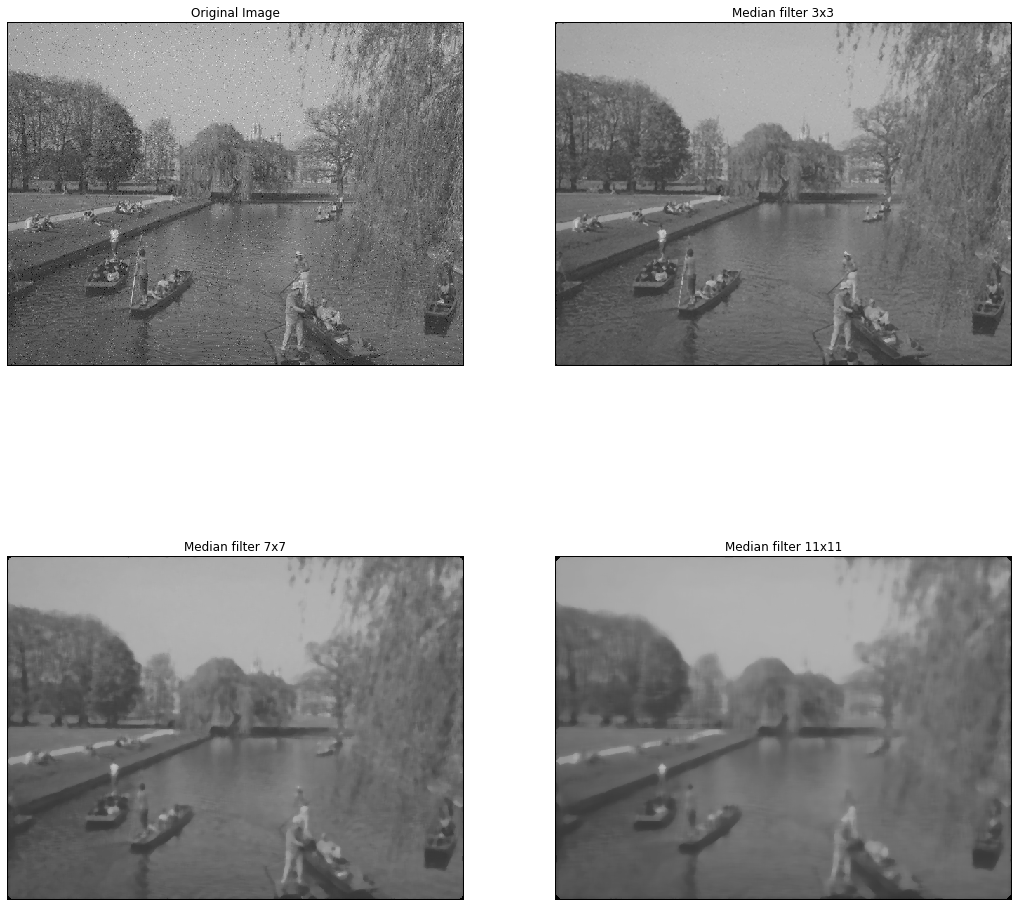

In [24]:
img2Median3Filtered = cv.medianBlur(img5, ksize=3)
img2Median7Filtered = cv.medianBlur(img5, ksize=7)
img2Median11Filtered = cv.medianBlur(img5, ksize=11)

compareImages((18,18), img5, img2Median3Filtered, img2Median7Filtered, img2Median11Filtered, 
              'Original Image', 'Median filter 3x3', 'Median filter 7x7','Median filter 11x11' )

The original state of the image has a bit of noise. After a median filter that is 3x3 the image is much clearer. The sky still has some nosise that can be easily seen but mostly there is not that much noise. The image still has all the details 

After the 7x7 filter the image has no noise left, but instead lost some of the sharpness and details.

The 11x11 removes the noise from the image but the details are completely lost. The edges are still intact.

The 3x3 mask is better suited for this picture because of the amount of noise and the details it keeps. To completely remove all noise the 7x7 filter is better suited for the job.

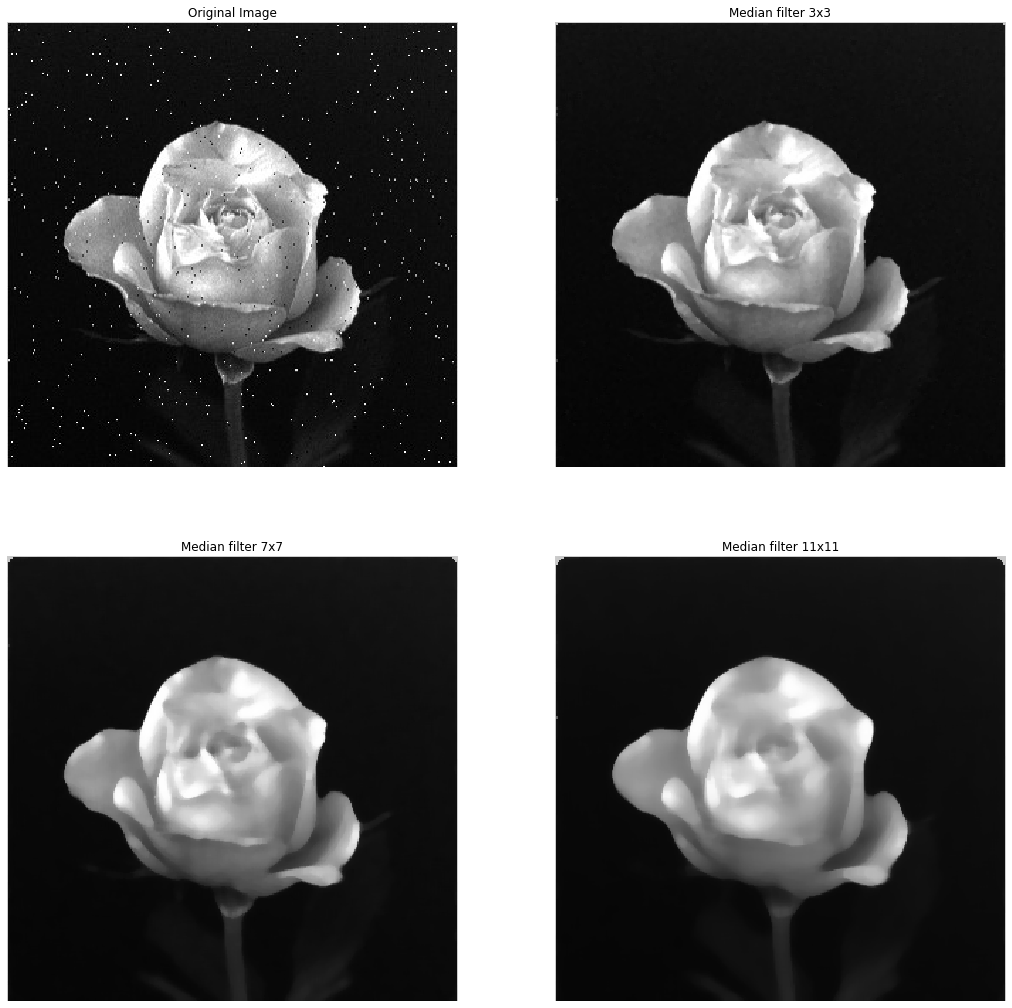

In [25]:
img3Median3Filtered = cv.medianBlur(img6, ksize=3)
img3Median7Filtered = cv.medianBlur(img6, ksize=7)
img3Median11Filtered = cv.medianBlur(img6, ksize=11)

compareImages((18,18), img6, img3Median3Filtered, img3Median7Filtered, img3Median11Filtered, 
              'Original Image', 'Median filter 3x3', 'Median filter 7x7','Median filter 11x11' )

The original state of the image is a bit noisy. After a median filter that is 3x3 the image is much clearer. You can see the stem of the rose. There is no noise left after the filter and the image is very clear

After the 7x7 filter the image has no noise left, as the previous filter. The image is losing the details and sharpness. The fine details are being lost.

The 11x11 filter the image has no noise left, as the previous filter. The image is losing the details and sharpness. The edges still remain but the fine details are completely lost.

The 3x3 mask is better suited for this picture because of the small amount of noise.

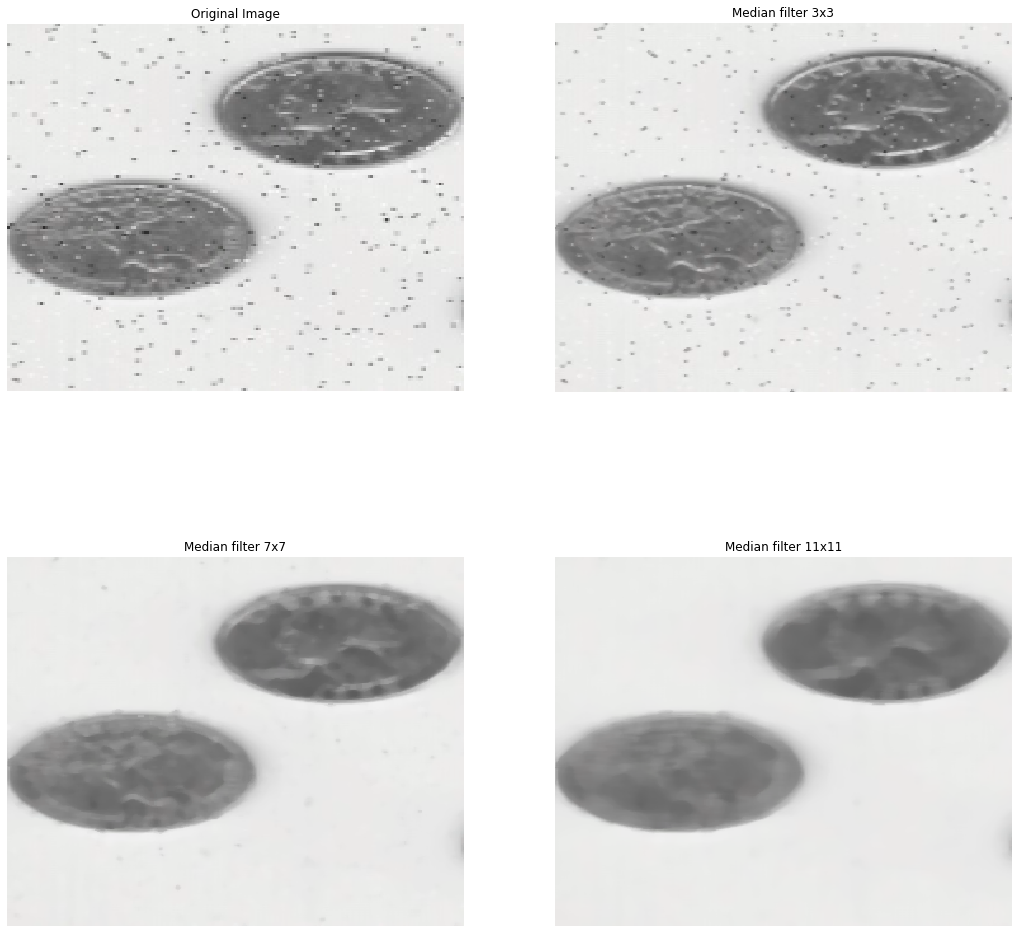

In [26]:
img4Median3Filtered = cv.medianBlur(img7, ksize=3)
img4Median7Filtered = cv.medianBlur(img7, ksize=7)
img4Median11Filtered = cv.medianBlur(img7, ksize=11)

compareImages((18,18), imgage, img4Median3Filtered, img4Median7Filtered, img4Median11Filtered, 
              'Original Image', 'Median filter 3x3', 'Median filter 7x7','Median filter 11x11' )

The original state of the image is a bit noisy. The noise seems to be several pixels together. After a median filter that is 3x3 the image is a bit clearer. There is still alot of noise left.

After the 7x7 filter the image has almost no noise left. The image is starting to lose the details and sharpness.

The 11x11 filter the image has no noise left. The image is losing the details and sharpness. The edges still remain but the fine details are completely lost.

The 7x7 mask is better suited for this picture because of the clumped up noise. 

**When the 11x11mask window filter is applied, the images lose their fine details and sharpness. The edges remain and the noise disappears.**